<a href="https://colab.research.google.com/github/riyak2107/LGM-DATA-SCIENCE/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **RIYA KHOT**

### **TASK 1 - IRIS FLOWER CLASSIFICATION ML PROJECT**

The Iris flower classification task involves categorizing iris flowers into three species (Setosa, Versicolor, Virginica) based on their sepal and petal measurements.


**Imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

**Reading CSV file**

In [ ]:
df=pd.read_csv("/content/Iris.csv")


In [ ]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Visualisation**

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

Histograms

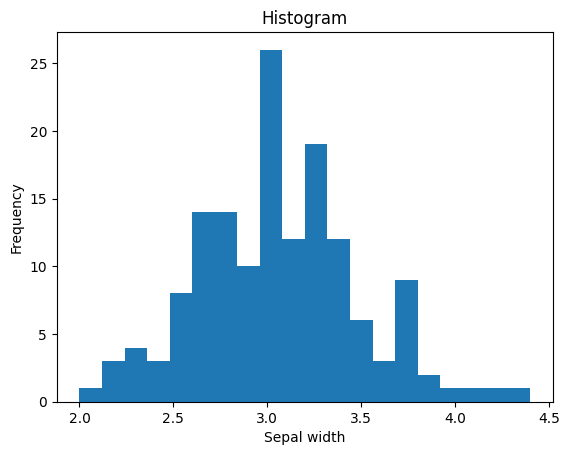

In [ ]:
plt.hist(df['SepalWidthCm'], bins=20)
plt.title("Histogram")
plt.xlabel("Sepal width")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Box Plot')

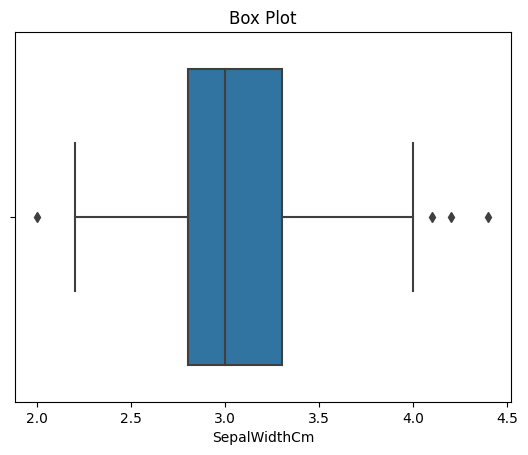

In [ ]:
sb.boxplot(x="SepalWidthCm", data=df)
plt.title("Box Plot")

Scatter Plot

In [ ]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

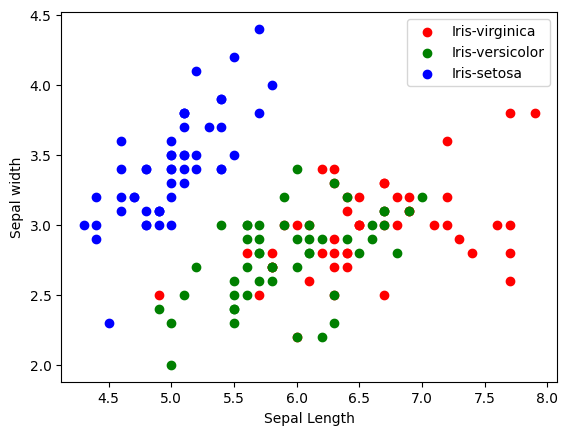

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend()

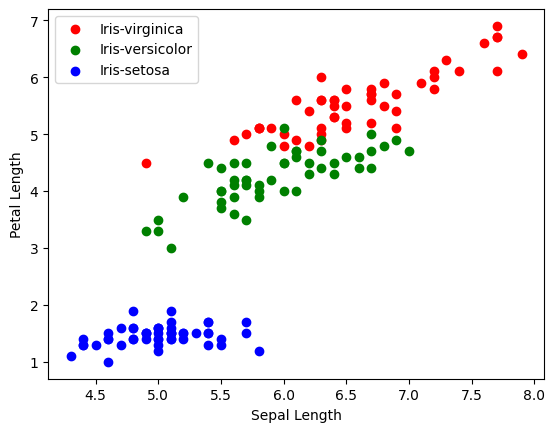

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

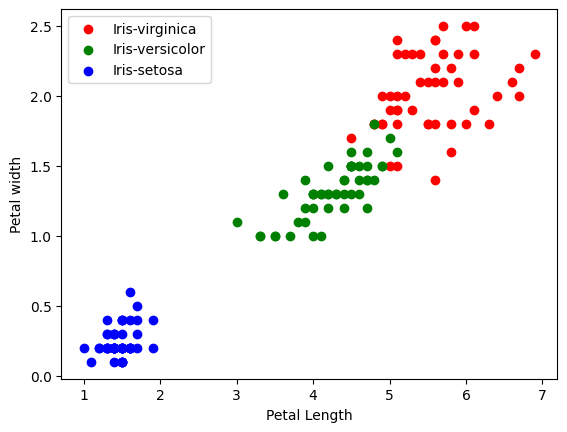

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()

Correalation Matrix

<ipython-input-13-5b574c6aa484>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

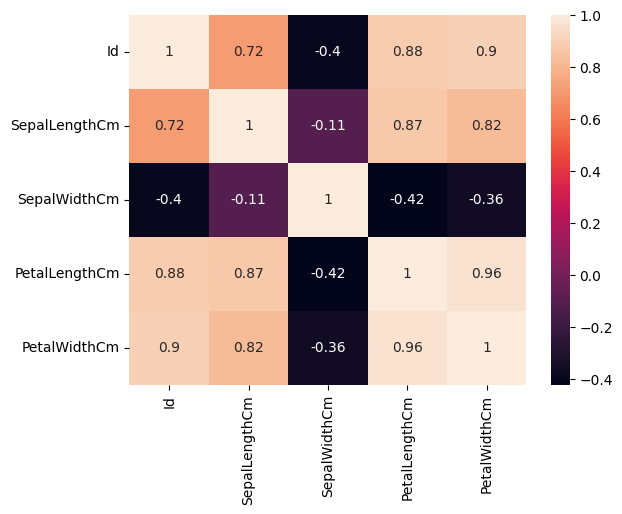

In [ ]:
corr=df.corr()
sb.heatmap(corr,annot=True)

**Applying label encoding**

Label encoding is a technique used to convert categorical data into numerical form. It assigns a unique numerical label to each unique category in a column.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
x=df.drop("Species",axis=1)

y=df["Species"]

**Spliting data into train and test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
lr=LogisticRegression(random_state=0)
rf=RandomForestClassifier(random_state=1)
gbm=GradientBoostingClassifier(n_estimators=10)
dt=DecisionTreeClassifier(random_state=0)
sv=svm.SVC()
nn=MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(1,1), random_state=0)
nb=MultinomialNB()
gb=GaussianNB()

**Applying algorithms**

Logistic Regression

In [ ]:
lr.fit(x_train,y_train)
y_lrp=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression : ' ,accuracy_score(y_test,y_lrp))

Logistic Regression :  1.0


Random Forest

In [ ]:
rf.fit(x_train,y_train)
y_rfp=rf.predict(x_test)

In [ ]:
print('Random forest : ' ,accuracy_score(y_test,y_rfp))

Random forest :  1.0


Decision tree

In [ ]:
dt.fit(x_train,y_train)
y_dtp=dt.predict(x_test)

In [ ]:
print('Decision Tree : ' ,accuracy_score(y_test,y_dtp))

Decision Tree :  0.9777777777777777


Support Vector Machine

In [ ]:
sv.fit(x_train,y_train)
y_svp=sv.predict(x_test)

In [ ]:
print('SVM : ' ,accuracy_score(y_test,y_svp))

SVM :  1.0


Naive Bayes

In [ ]:
nb.fit(x_train,y_train)
y_nbp=nb.predict(x_test)

In [ ]:
print('Naive Bayes : ' ,accuracy_score(y_test,y_nbp))

Naive Bayes :  0.8222222222222222
